In [3003]:
# import nescessary liberaries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

In [3004]:
# read data from csv file
ds_train = pd.read_csv("C:\\Users\\ROAA\\Desktop\\Applai\\Loan prediction\\Loan train data.csv")
ds_test = pd.read_csv("C:\\Users\\ROAA\\Desktop\\Applai\\Loan prediction\\New Customer.csv")

In [3005]:
# data info
ds_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [3006]:
ds_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [3007]:
ds_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3008]:
# know the uniqe values in the  coulmbs that we might need to change later
print(ds_train['Gender'].unique())
print(ds_train['Married'].unique())
print(ds_train['Education'].unique())
print(ds_train['Self_Employed'].unique())
print(ds_train['Property_Area'].unique())
print(ds_train['Loan_Status'].unique())
print(ds_train['Dependents'].unique())

['Male' 'Female' nan]
['No' 'Yes' nan]
['Graduate' 'Not Graduate']
['No' 'Yes' nan]
['Urban' 'Rural' 'Semiurban']
['Y' 'N']
['0' '1' '2' '3+' nan]


In [3009]:
#make the female in the coulmb = 0 and males = 1
ds_train['Married'] = np.where(ds_train['Married'] == 'No', 0, 1)
#make the null values in married coulmb = to the average of the married coulmb
ds_train['Married'].fillna(ds_train['Married'].mean(), inplace=True)

In [3010]:
#drop all the rows that have null values
ds_train.dropna(axis=0, inplace=True)
ds_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [3011]:
# change the value of male to 1 and female to 0
ds_train['Gender']= np.where(ds_train['Gender'] == 'Male', 1, 0)
# change the value of graduate to 1 and not graduated to 0
ds_train['Education']= np.where(ds_train['Education'] == 'Graduate', 1, 0)
# change the value of yes to 1 and no to 0
ds_train['Self_Employed']= np.where(ds_train['Self_Employed'] == 'Yes', 1, 0)
# change the value of y to 1 and n to 0
ds_train['Loan_Status'] = np.where(ds_train['Loan_Status'] == 'Y', 1 , 0)
# change the value of urban to 0, rural to 1 and semiurban to 2
ds_train['Property_Area']= np.where(ds_train['Property_Area']=='Urban',0,np.where(ds_train['Property_Area'] == 'Rural' ,1,2))
# change the value of dependants
ds_train['Dependents'] = np.where(ds_train['Dependents'] == '0', 0,  np.where(ds_train['Dependents'] == '1', 1, np.where(ds_train['Dependents'] == '2', 2, 3)))

In [3012]:
ds_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [3013]:
ds_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [3014]:
#make the female in the coulmb = 0 and males = 1
ds_test['Married'] = np.where(ds_test['Married'] == 'No', 0, 1)
# change the value of male to 1 and female to 0
ds_test['Gender']= np.where(ds_test['Gender'] == 'Male', 1, 0)
# change the value of graduate to 1 and not graduated to 0
ds_test['Education']= np.where(ds_test['Education'] == 'Graduate', 1, 0)
# change the value of yes to 1 and no to 0
ds_test['Self_Employed']= np.where(ds_test['Self_Employed'] == 'Yes', 1, 0)
# change the value of urban to 0, rural to 1 and semiurban to 2
ds_test['Property_Area']= np.where(ds_test['Property_Area']=='Urban',0,np.where(ds_test['Property_Area'] == 'Rural' ,1,2))
# change the value of dependants
ds_test['Dependents'] = np.where(ds_test['Dependents'] == '0', 0,  np.where(ds_test['Dependents'] == '1', 1, np.where(ds_test['Dependents'] == '2', 2, 3)))

In [3015]:

#make the null values in married coulmb = to the average of the married coulmb
ds_test['Dependents'].fillna(ds_test['Dependents'].mean(), inplace=True)
ds_test['Self_Employed'].fillna(ds_test['Self_Employed'].mean(), inplace=True)
ds_test['Married'].fillna(ds_test['Married'].mean(), inplace=True)
ds_test.dropna(axis=0, inplace=True)
ds_test.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

C:\Users\ROAA\AppData\Local\Temp\ipykernel_31248\318295658.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ds_train['Education'], shade=True, color='Black')


<Axes: xlabel='Education', ylabel='Density'>

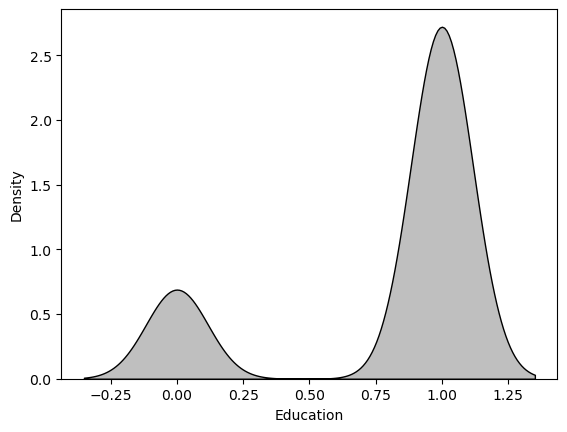

In [3016]:
sns.kdeplot(ds_train['Education'], shade=True, color='Black')


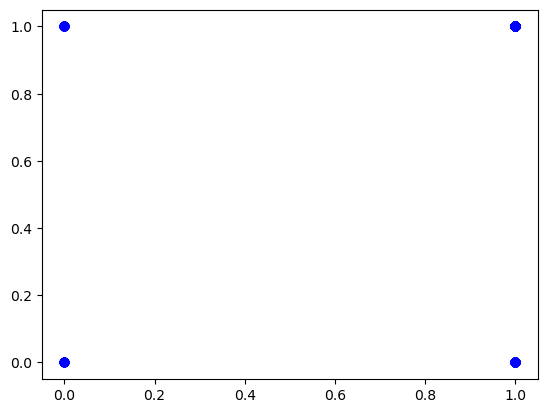

In [3017]:

plt.scatter(ds_train['Gender'], ds_train['Loan_Status'], color='blue')

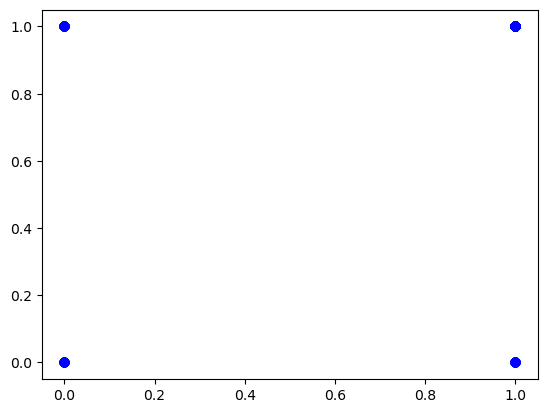

In [3018]:
plt.scatter(ds_train['Married'], ds_train['Loan_Status'], color='blue')

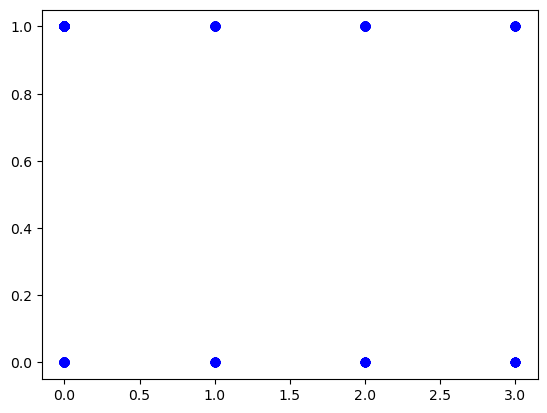

In [3019]:
plt.scatter(ds_train['Dependents'], ds_train['Loan_Status'], color='blue')

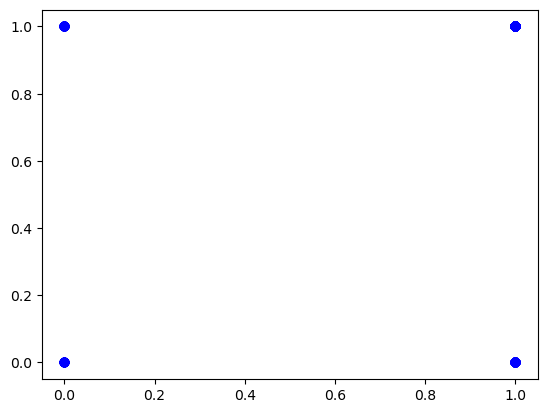

In [3020]:
plt.scatter(ds_train['Education'], ds_train['Loan_Status'], color='blue')

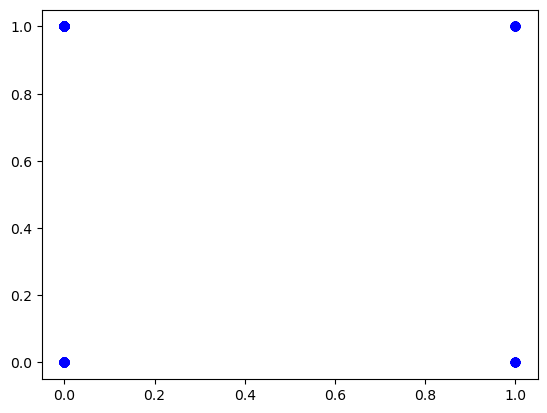

In [3021]:
plt.scatter(ds_train['Self_Employed'], ds_train['Loan_Status'], color='blue')

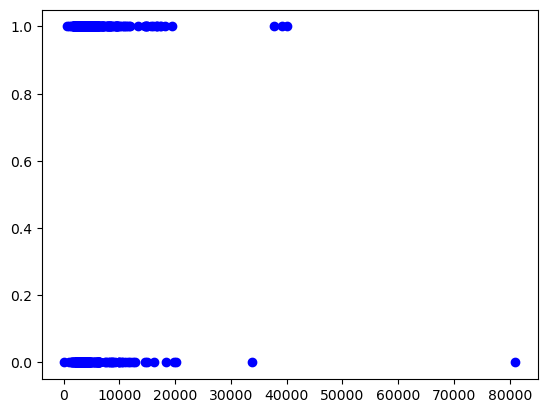

In [3022]:
plt.scatter(ds_train['ApplicantIncome'], ds_train['Loan_Status'], color='blue')

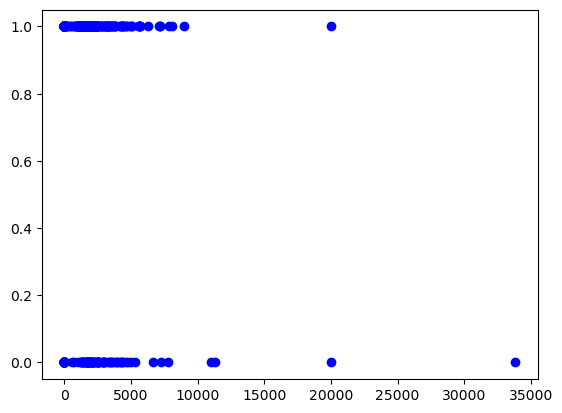

In [3023]:
plt.scatter(ds_train['CoapplicantIncome'], ds_train['Loan_Status'], color='blue')

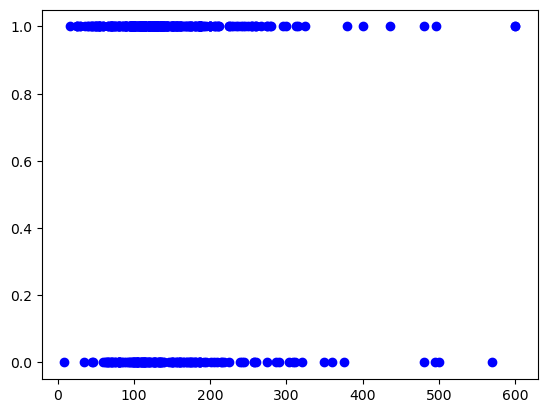

In [3024]:
plt.scatter(ds_train['LoanAmount'], ds_train['Loan_Status'], color='blue')

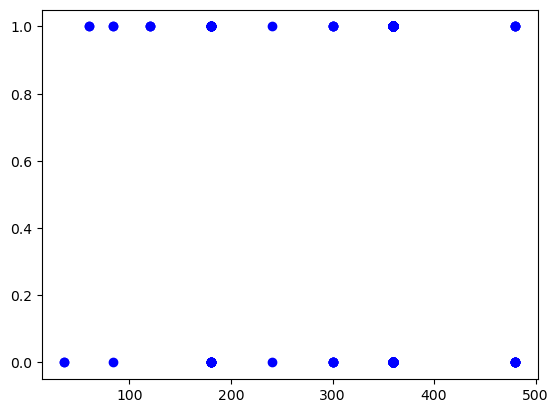

In [3025]:
plt.scatter(ds_train['Loan_Amount_Term'], ds_train['Loan_Status'], color='blue')

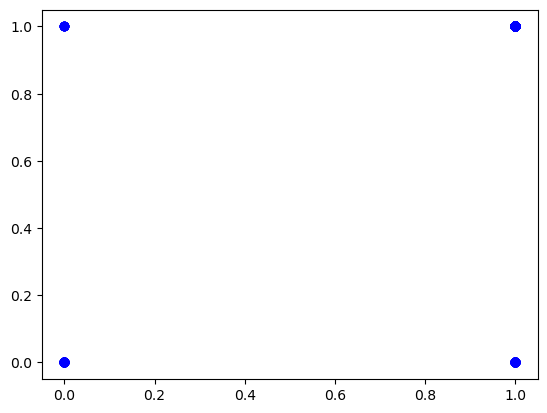

In [3026]:
plt.scatter(ds_train['Credit_History'], ds_train['Loan_Status'], color='blue')

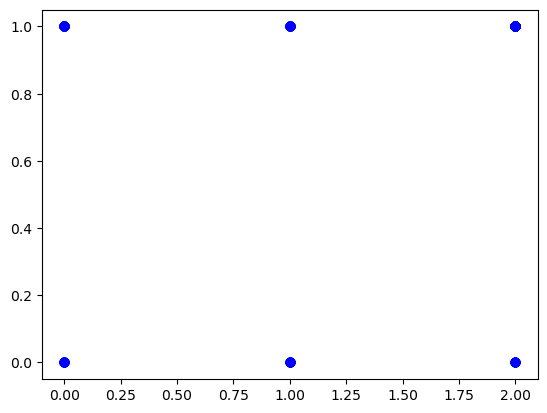

In [3027]:
plt.scatter(ds_train['Property_Area'], ds_train['Loan_Status'], color='blue')

Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []


<Axes: xlabel='Married', ylabel='Loan_Status'>

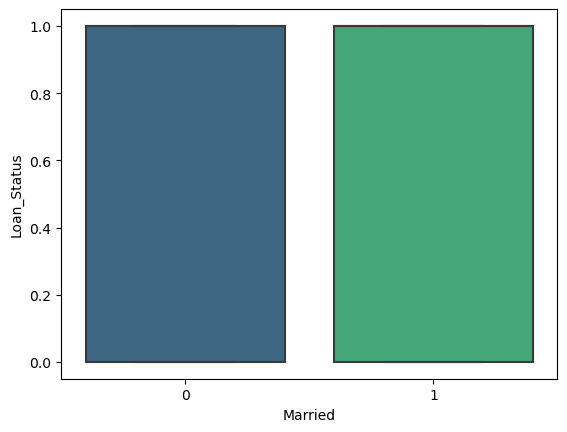

In [3028]:
#outliers
z_scores = zscore(ds_train['Married'])
outliers_married = (z_scores > 3) | (z_scores < -3)
print(ds_train[outliers_married])
sns.boxplot(x='Married', y='Loan_Status', data=ds_train, palette='viridis')

Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []


<Axes: xlabel='Education', ylabel='Loan_Status'>

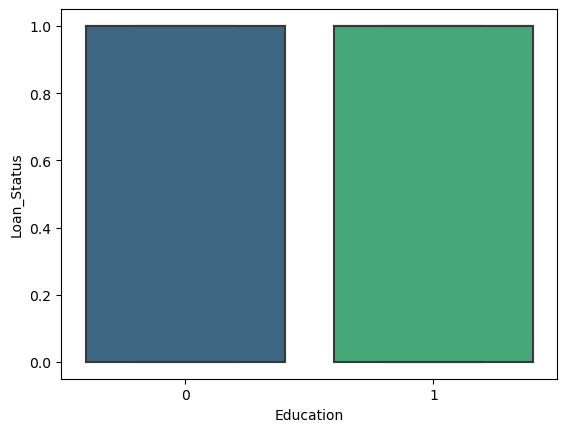

In [3029]:
#outliers
z_scores = zscore(ds_train['Education'])
outliers_married = (z_scores > 3) | (z_scores < -3)
print(ds_train[outliers_married])
sns.boxplot(x='Education', y='Loan_Status', data=ds_train, palette='viridis')

Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []


<Axes: xlabel='Dependents', ylabel='Loan_Status'>

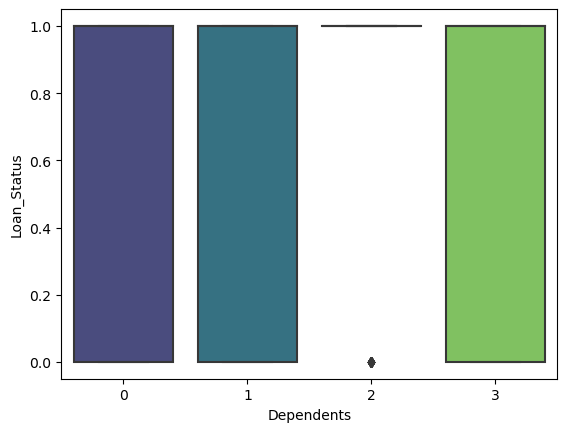

In [3030]:
z_scores = zscore(ds_train['Dependents'])
outliers_kids = (z_scores > 3) | (z_scores < -3)
print(ds_train[outliers_kids])
sns.boxplot(x='Dependents', y='Loan_Status', data=ds_train, palette='viridis')

Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []


<Axes: xlabel='Self_Employed', ylabel='Loan_Status'>

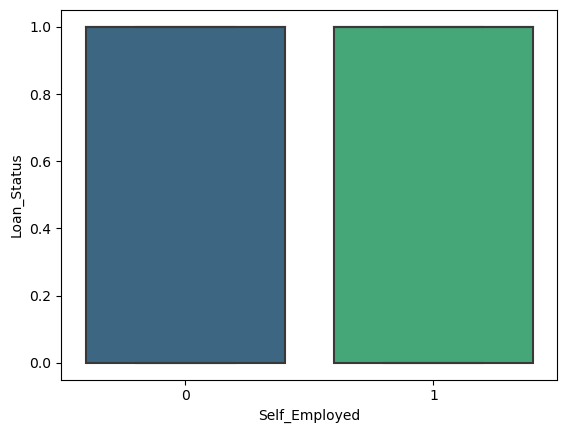

In [3031]:
z_scores = zscore(ds_train['Self_Employed'])
outliers_emp = (z_scores > 3) | (z_scores < -3)
print(ds_train[outliers_emp])
sns.boxplot(x='Self_Employed', y='Loan_Status', data=ds_train, palette='viridis')

In [3032]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


ds_train.drop('Loan_ID', axis=1, inplace=True)

# Separate independent variables (features) and dependent variable (target)
X = ds_train.iloc[:, :-1] # Features are all columns except the last one
y = ds_train.iloc[:, -1]  # Dependent variable is the last column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
logistic_regression = LogisticRegression()

# Define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Perform grid search
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best hyperparameters found:")
print(grid_search.best_params_)

# Evaluate model performance on test data
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test accuracy:", test_accuracy)


c:\Users\ROAA\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ROAA\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ROAA\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ROAA\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ROAA\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ROAA\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

Best hyperparameters found:
{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Test accuracy: 0.8229166666666666


In [3033]:
#knn
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
y_preds=model.predict(X_test)

print(f"Testing score = {accuracy_score(y_test,y_preds)}")
confusion_matrix(y_test, y_preds)

Testing score = 0.65625


array([[ 5, 23],
       [10, 58]], dtype=int64)

In [3034]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Extracting independent and dependent variables
X = ds_train.iloc[:, 4:-1].values
y = ds_train.iloc[:, -1].values  # Assuming the target variable is the last column

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=41)

# Initialize and train the logistic regression model
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = classifier.predict(X_test)
print(y_pred)

# Evaluating the model
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)


[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1
 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 1 1 0 1 1]
Confusion Matrix:
[[19 11]
 [ 2 88]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.63      0.75        30
           1       0.89      0.98      0.93        90

    accuracy                           0.89       120
   macro avg       0.90      0.81      0.84       120
weighted avg       0.89      0.89      0.88       120



In [3035]:
test = ds_test.iloc[:, 5:].values
ds_test.drop('Loan_ID', axis=1, inplace=True)
#predict the loan
y_predict_new_customer = classifier.predict(test)
print(y_predict_new_customer)
y_predict_new_customer.reshape(-1, 1)
ds_test['Loan_Status'] = y_predict_new_customer

# Assuming 'Married' is the column indicating marital status and 'Property_Area' is the column indicating the area
married_index = ds_test.columns.get_loc('Married')
property_area_index = ds_test.columns.get_loc('Property_Area')
print(ds_test.head())
# Filter new customer data for married people in semiurban area who obtained the loan
married_semiurban_data = ds_test[(ds_test['Married'] == 1) & (ds_test['Property_Area'] == 2)]

# Count the number of rows
num_married_semiurban_loans = np.sum(married_semiurban_data['Loan_Status'])  # Assuming the last column indicates loan obtained

# Total number of rows meeting the criteria
total_married_semiurban = len(ds_test)

# Calculate the percentage
percentage_married_semiurban_loans = (num_married_semiurban_loans / total_married_semiurban) * 100

print("Percentage of married people in semiurban area who obtained the loan: {:.2f}%".format(percentage_married_semiurban_loans))


[1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0
 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1
 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1]
   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        1           0          1              0             5720   
1       1        1           1          1              0             3076   
2       1        1           2          1              0             5000   
4       1        0        

In [3036]:
#logistic regression is better with high accuracy and more persise prediction of 89% and 15.24% of married and semiurban people have accepted loands